In [ ]:
"""
CS 4391 Homework 3 Programming
Implement the harris_corner() function and the non_maximum_suppression() function in this python script
Harris corner detector
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt


#TODO: implement this function
# input: R is a Harris corner score matrix with shape [height, width]
# output: mask with shape [height, width] with valuse 0 and 1, where 1s indicate corners of the input image 
# idea: for each pixel, check its 8 neighborhoods in the image. If the pixel is the maximum compared to these
# 8 neighborhoods, mark it as a corner with value 1. Otherwise, mark it as non-corner with value 0
def non_maximum_suppression(R):
    # Define a neighborhood window size for non-maximum suppression
    neighborhood_size = 8  # You can adjust this as needed

    # Initialize an empty binary mask for corner points
    mask = np.zeros_like(R, dtype=np.uint8)

    # Iterate through the R-score matrix
    height, width = R.shape
    for y in range(height):
        for x in range(width):
            # Skip pixels with R-score equal to 0
            if R[y, x] == 0:
                continue

            # Define the region of interest (ROI) around the current pixel
            roi_x_min = max(0, x - neighborhood_size // 2)
            roi_x_max = min(width, x + neighborhood_size // 2 + 1)
            roi_y_min = max(0, y - neighborhood_size // 2)
            roi_y_max = min(height, y + neighborhood_size // 2 + 1)

            # Extract the neighborhood region
            roi = R[roi_y_min:roi_y_max, roi_x_min:roi_x_max]

            # Check if the current pixel has the maximum value in its neighborhood
            if R[y, x] == np.max(roi):
                mask[y, x] = 255  # Mark it as a corner point

    return mask


#TODO: implement this function
# input: im is an RGB image with shape [height, width, 3]
# output: corner_mask with shape [height, width] with valuse 0 and 1, where 1s indicate corners of the input image
# Follow the steps in Lecture 7 slides 26-27
# You can use opencv functions and numpy functions
def harris_corner(im):
    # Step 0: Convert RGB to gray-scale image
    gray1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Step 1: Compute image gradient using Sobel filters
    Ix = cv2.Sobel(gray1, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray1, cv2.CV_64F, 0, 1, ksize=3)

    # Step 2: Compute products of derivatives at every pixel
    Ixx = Ix * Ix
    Ixy = Ix * Iy
    Iyy = Iy * Iy

    # Step 3: Compute the sums of products of derivatives at each pixel using Gaussian filter
    k_size = 5  # Window size
    sigma = 1.5  # Sigma value
    Ixx = cv2.GaussianBlur(Ixx, (k_size, k_size), sigma)
    Ixy = cv2.GaussianBlur(Ixy, (k_size, k_size), sigma)
    Iyy = cv2.GaussianBlur(Iyy, (k_size, k_size), sigma)

    # Step 4: Compute determinant and trace of the M matrix
    det_M = Ixx * Iyy - Ixy**2
    trace_M = Ixx + Iyy

    # Step 5: Compute R scores with k = 0.05
    k = 0.05
    R = det_M - k * (trace_M**2)

    # Step 6: Thresholding
    threshold = 0.01 * R.max()
    R[R < threshold] = 0

    # Step 7: Non-maximum suppression (you need to implement this function)
    corner_mask = non_maximum_suppression(R)

    return corner_mask


# main function
if __name__ == '__main__':

    # read the image in data
    # rgb image
    rgb_filename = '/Users/JOSH/Desktop/CS 4391                    (Vision)/HW/3/homework3_programming/data/000006-color.jpg'
    im = cv2.imread(rgb_filename)
    
    # your implementation of the harris corner detector
    corner_mask = harris_corner(im)
    
    # opencv harris corner
    img = im.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    opencv_mask = dst > 0.01 * dst.max()
        
    # visualization for your debugging
    fig = plt.figure()
        
   # show RGB image
    ax = fig.add_subplot(1, 3, 1)
    plt.imshow(im[:, :, (2, 1, 0)])
    ax.set_title('RGB image')
        
    # show our corner image
    ax = fig.add_subplot(1, 3, 2)
    plt.imshow(im[:, :, (2, 1, 0)])
    index = np.where(corner_mask > 0)
    plt.scatter(x=index[1], y=index[0], c='y', s=5)
    ax.set_title('our corner image')
    
    # show opencv corner image
    ax = fig.add_subplot(1, 3, 3)
    plt.imshow(im[:, :, (2, 1, 0)])
    index = np.where(opencv_mask > 0)
    plt.scatter(x=index[1], y=index[0], c='y', s=5)
    ax.set_title('opencv corner image')

    plt.show()


In [ ]:
"""
CS 4391 Homework 3 Programming
Implement sift_matching() function in this python script
SIFT feature matching
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

#TODO: implement this function
# input: des1 is a matrix of SIFT descriptors with shape [m, 128]
# input: des2 is a matrix of SIFT descriptors with shape [n, 128]
# output: index is an array with lenth m, where the ith element indicates the matched descriptor from des2 for the ith descriptor in des1
# for example, if the 10th element in index is 100, that means des1[10, :] matches to des2[100, :]
# idea: for each descriptor in des1, find its matching by computing L2 distance with all the descriptors in des2; the best matching corresponds to the smallest L2 distance
def sift_matching(des1, des2):

    m, n = des1.shape[0], des2.shape[0]
    index = np.zeros(m, dtype=int)  # Initialize an array to store matching indices

    for i in range(m):
        min_dist = float('inf')
        for j in range(n):
            # Compute the L2 distance between des1[i] and des2[j]
            dist = np.linalg.norm(des1[i] - des2[j])
            
            if dist < min_dist:
                min_dist = dist
                index[i] = j  # Update the matching index for des1[i]



    return index


# main function
if __name__ == '__main__':

    # read image 1
    rgb_filename1 = '/Users/JOSH/Desktop/CS 4391                    (Vision)/HW/3/homework3_programming/data/000006-color.jpg'    
    im1 = cv2.imread(rgb_filename1)
    width = im1.shape[1]
    
    # read image 2
    rgb_filename2 = '/Users/JOSH/Desktop/CS 4391                    (Vision)/HW/3/homework3_programming/data/000007-color.jpg'
    im2 = cv2.imread(rgb_filename2)
    
    # SIFT feature extractor
    sift = cv2.SIFT_create()
    # detect features on the two images
    # keypoints with the following fields: 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size'
    keypoints_1, descriptors_1 = sift.detectAndCompute(im1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(im2, None)
    
    # SIFT matching
    #TODO: implement this function
    index = sift_matching(descriptors_1, descriptors_2)
    
    # visualization for your debugging
    fig = plt.figure()

    # show the concatenated image
    ax = fig.add_subplot(1, 1, 1)
    im = np.concatenate((im1, im2), axis=1)
    plt.imshow(im[:, :, (2, 1, 0)])
    
    # show feature points
    ax.set_title('SIFT feature matching')
    for i in range(len(keypoints_1)):
        pt = keypoints_1[i].pt
        plt.scatter(x=pt[0], y=pt[1], c='y', s=5)    
        
    for i in range(len(keypoints_2)):
        pt = keypoints_2[i].pt
        plt.scatter(x=pt[0] + width, y=pt[1], c='y', s=5)    
        
    # draw lines to show the matching
    # subsampling by a factor of 10
    for i in range(0, len(keypoints_1), 10):
        pt1 = keypoints_1[i].pt
        matched = index[i]
        pt2 = keypoints_2[matched].pt
        x = [pt1[0], pt2[0] + width]
        y = [pt1[1], pt2[1]]
        plt.plot(x, y, '--', linewidth=1)
        
    plt.show()


In [ ]:
"""
CS 4391 Homework 3 Programming
Implement sift_matching() function in this python script
SIFT feature matching
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

#TODO: implement this function
# input: des1 is a matrix of SIFT descriptors with shape [m, 128]
# input: des2 is a matrix of SIFT descriptors with shape [n, 128]
# output: index is an array with lenth m, where the ith element indicates the matched descriptor from des2 for the ith descriptor in des1
# for example, if the 10th element in index is 100, that means des1[10, :] matches to des2[100, :]
# idea: for each descriptor in des1, find its matching by computing L2 distance with all the descriptors in des2; the best matching corresponds to the smallest L2 distance
def sift_matching(des1, des2):
    index = np.zeros(des1.shape[0], dtype=int)  # Initialize an array to store the indices of matched descriptors

    for i in range(des1.shape[0]):
        min_distance = float('inf')  # Initialize the minimum distance as infinity
        min_index = -1  # Initialize the index of the best match as -1

        for j in range(des2.shape[0]):
            # Compute the L2 (Euclidean) distance between des1[i] and des2[j]
            distance = np.linalg.norm(des1[i] - des2[j])

            if distance < min_distance:
                min_distance = distance
                min_index = j

        # Store the index of the best match for des1[i]
        index[i] = min_index

    return index

# main function
if __name__ == '__main__':

    # read image 1
    rgb_filename1 = '/Users/JOSH/Desktop/CS 4391                    (Vision)/HW/3/homework3_programming/data/000006-color.jpg'    
    im1 = cv2.imread(rgb_filename1)
    width = im1.shape[1]
    
    # read image 2
    rgb_filename2 = '/Users/JOSH/Desktop/CS 4391                    (Vision)/HW/3/homework3_programming/data/000007-color.jpg'
    im2 = cv2.imread(rgb_filename2)
    
    # SIFT feature extractor
    sift = cv2.SIFT_create()
    # detect features on the two images
    # keypoints with the following fields: 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size'
    keypoints_1, descriptors_1 = sift.detectAndCompute(im1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(im2, None)
    
    # SIFT matching
    #TODO: implement this function
    index = sift_matching(descriptors_1, descriptors_2)
    
    # visualization for your debugging
    fig = plt.figure()

    # show the concatenated image
    ax = fig.add_subplot(1, 1, 1)
    im = np.concatenate((im1, im2), axis=1)
    plt.imshow(im[:, :, (2, 1, 0)])
    
    # show feature points
    ax.set_title('SIFT feature matching')
    for i in range(len(keypoints_1)):
        pt = keypoints_1[i].pt
        plt.scatter(x=pt[0], y=pt[1], c='y', s=5)    
        
    for i in range(len(keypoints_2)):
        pt = keypoints_2[i].pt
        plt.scatter(x=pt[0] + width, y=pt[1], c='y', s=5)    
        
    # draw lines to show the matching
    # subsampling by a factor of 10
    for i in range(0, len(keypoints_1), 10):
        pt1 = keypoints_1[i].pt
        matched = index[i]
        pt2 = keypoints_2[matched].pt
        x = [pt1[0], pt2[0] + width]
        y = [pt1[1], pt2[1]]
        plt.plot(x, y, '--', linewidth=1)
        
    plt.show()


In [ ]:
"""
CS 4391 Homework 3 Programming
Implement the harris_corner() function and the non_maximum_suppression() function in this python script
Harris corner detector
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt


#TODO: implement this function
# input: R is a Harris corner score matrix with shape [height, width]
# output: mask with shape [height, width] with valuse 0 and 1, where 1s indicate corners of the input image 
# idea: for each pixel, check its 8 neighborhoods in the image. If the pixel is the maximum compared to these
# 8 neighborhoods, mark it as a corner with value 1. Otherwise, mark it as non-corner with value 0
def non_maximum_suppression(R):
    h1,w1=R.shape
    mask=np.zeros_like(R,dtype=np.uint8)
    for y in range(h1):
        for x in range(w1):
            if R[y,x]!=0:
                if R[y,x]==np.max(R[max(0,y-8//2):min(h1,y+8//2+1),
                                    max(0,x-8//2):min(w1,x+8//2+1)]):
                    mask[y,x]=255  
    return mask


#TODO: implement this function
# input: im is an RGB image with shape [height, width, 3]
# output: corner_mask with shape [height, width] with valuse 0 and 1, where 1s indicate corners of the input image
# Follow the steps in Lecture 7 slides 26-27
# You can use opencv functions and numpy functions
def harris_corner(im):

    # step 0: convert RGB to gray-scale image
    gray1=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    
    # step 1: compute image gradient using Sobel filters
    # https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html
    Ix=cv2.Sobel(gray1,cv2.CV_64F,1,0,ksize=3)
    Iy=cv2.Sobel(gray1,cv2.CV_64F,0,1,ksize=3)

    # step 2: compute products of derivatives at every pixels
    Ix2=Ix*Ix
    Iy2=Iy*Iy
    Ixy=Ix*Iy

    # step 3: compute the sums of products of derivatives at each pixel using Gaussian filter (window size: 5x5, sigma = 1.5) from OpenCV
    Ix2=cv2.GaussianBlur(Ix2,(5,5),1.5)
    Iy2=cv2.GaussianBlur(Iy2,(5,5),1.5)
    Ixy=cv2.GaussianBlur(Ixy,(5,5),1.5)

    # step 4: compute determinant and trace of the M matrix
    detM=Ix2*Iy2-Ixy**2
    traceM=Ix2+Iy2
    
    # step 5: compute R scores with k = 0.05
    k=0.05
    R=detM-k*(traceM**2)
    
    # step 6: thresholding
    # up to now, you shall get a R score matrix with shape [height, width]
    threshold=0.01*R.max()
    R[R<threshold]=0
    
    # step 7: non-maximum suppression
    #TODO implement the non_maximum_suppression function above
    corner_mask = non_maximum_suppression(R)

    return corner_mask


# main function
if __name__ == '__main__':

    # read the image in data
    # rgb image
    rgb_filename = '/Users/JOSH/Desktop/CS 4391                    (Vision)/HW/3/homework3_programming/data/000006-color.jpg'
    im = cv2.imread(rgb_filename)
    
    # your implementation of the harris corner detector
    corner_mask = harris_corner(im)
    
    # opencv harris corner
    img = im.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    opencv_mask = dst > 0.01 * dst.max()
        
    # visualization for your debugging
    fig = plt.figure()
        
    # show RGB image
    ax = fig.add_subplot(1, 3, 1)
    plt.imshow(im[:, :, (2, 1, 0)])
    ax.set_title('RGB image')
        
    # show our corner image
    ax = fig.add_subplot(1, 3, 2)
    plt.imshow(im[:, :, (2, 1, 0)])
    index = np.where(corner_mask > 0)
    plt.scatter(x=index[1], y=index[0], c='y', s=5)
    ax.set_title('our corner image')
    
    # show opencv corner image
    ax = fig.add_subplot(1, 3, 3)
    plt.imshow(im[:, :, (2, 1, 0)])
    index = np.where(opencv_mask > 0)
    plt.scatter(x=index[1], y=index[0], c='y', s=5)
    ax.set_title('opencv corner image')

    plt.show()


In [ ]:
"""
CS 4391 Homework 3 Programming
Implement sift_matching() function in this python script
SIFT feature matching
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

#TODO: implement this function
# input: des1 is a matrix of SIFT descriptors with shape [m, 128]
# input: des2 is a matrix of SIFT descriptors with shape [n, 128]
# output: index is an array with lenth m, where the ith element indicates the matched descriptor from des2 for the ith descriptor in des1
# for example, if the 10th element in index is 100, that means des1[10, :] matches to des2[100, :]
# idea: for each descriptor in des1, find its matching by computing L2 distance with all the descriptors in des2; the best matching corresponds to the smallest L2 distance
def sift_matching(des1,des2):
    index=np.zeros(des1.shape[0],dtype=int) 
    for b in range(des1.shape[0]):
        dist1=float('inf')
        for c in range(des2.shape[0]):
            dist2=np.linalg.norm(des1[b]-des2[c])
            if dist2<dist1:
                dist1=dist2
                index[b]=c  
    return index


# main function
if __name__ == '__main__':

    # read image 1
    rgb_filename1 = '/Users/JOSH/Desktop/CS 4391                    (Vision)/HW/3/homework3_programming/data/000006-color.jpg'    
    im1 = cv2.imread(rgb_filename1)
    width = im1.shape[1]
    
    # read image 2
    rgb_filename2 = '/Users/JOSH/Desktop/CS 4391                    (Vision)/HW/3/homework3_programming/data/000007-color.jpg'
    im2 = cv2.imread(rgb_filename2)
    
    # SIFT feature extractor
    sift = cv2.SIFT_create()

    # detect features on the two images
    # keypoints with the following fields: 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size'
    keypoints_1, descriptors_1 = sift.detectAndCompute(im1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(im2, None)
    
    # SIFT matching
    #TODO: implement this function
    index = sift_matching(descriptors_1, descriptors_2)
    
    # visualization for your debugging
    fig = plt.figure()

    # show the concatenated image
    ax = fig.add_subplot(1, 1, 1)
    im = np.concatenate((im1, im2), axis=1)
    plt.imshow(im[:, :, (2, 1, 0)])
    
    # show feature points
    ax.set_title('SIFT feature matching')
    for i in range(len(keypoints_1)):
        pt = keypoints_1[i].pt
        plt.scatter(x=pt[0], y=pt[1], c='y', s=5)    
        
    for i in range(len(keypoints_2)):
        pt = keypoints_2[i].pt
        plt.scatter(x=pt[0] + width, y=pt[1], c='y', s=5)    
        
    # draw lines to show the matching
    # subsampling by a factor of 10
    for i in range(0, len(keypoints_1), 10):
        pt1 = keypoints_1[i].pt
        matched = index[i]
        pt2 = keypoints_2[matched].pt
        x = [pt1[0], pt2[0] + width]
        y = [pt1[1], pt2[1]]
        plt.plot(x, y, '--', linewidth=1)
        
    plt.show()


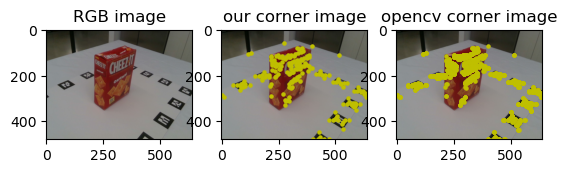

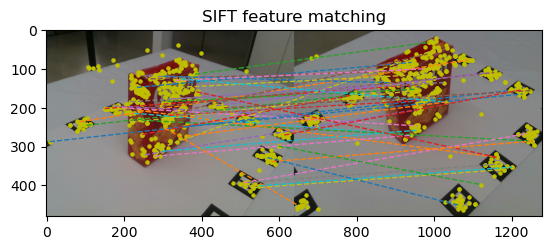

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


"""
CS 4391 Homework 3 Programming
Implement the harris_corner() function and the non_maximum_suppression() function in this python script
Harris corner detector
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt


#TODO: implement this function
# input: R is a Harris corner score matrix with shape [height, width]
# output: mask with shape [height, width] with valuse 0 and 1, where 1s indicate corners of the input image 
# idea: for each pixel, check its 8 neighborhoods in the image. If the pixel is the maximum compared to these
# 8 neighborhoods, mark it as a corner with value 1. Otherwise, mark it as non-corner with value 0
def non_maximum_suppression(R):
    h1,w1=R.shape
    mask=np.zeros_like(R,dtype=np.uint8)
    for f in range(h1):
        for s in range(w1):
            if R[f,s]!=0:
                if R[f,s]==np.max(R[max(0,f-8//2):min(h1,f+8//2+1),
                                    max(0,s-8//2):min(w1,s+8//2+1)]):
                    mask[f,s]=255  
    return mask

#TODO: implement this function
# input: im is an RGB image with shape [height, width, 3]
# output: corner_mask with shape [height, width] with valuse 0 and 1, where 1s indicate corners of the input image
# Follow the steps in Lecture 7 slides 26-27
# You can use opencv functions and numpy functions
def harris_corner(im):

    # step 0: convert RGB to gray-scale image
    gray1=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    
    # step 1: compute image gradient using Sobel filters
    # https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html
    Ix=cv2.Sobel(gray1,cv2.CV_64F,1,0,ksize=3)
    Iy=cv2.Sobel(gray1,cv2.CV_64F,0,1,ksize=3)

    # step 2: compute products of derivatives at every pixels
    Ix2=Ix*Ix
    Iy2=Iy*Iy
    Ixy=Ix*Iy

    # step 3: compute the sums of products of derivatives at each pixel using Gaussian filter (window size: 5x5, sigma = 1.5) from OpenCV
    Ix2=cv2.GaussianBlur(Ix2,(5,5),1.5)
    Iy2=cv2.GaussianBlur(Iy2,(5,5),1.5)
    Ixy=cv2.GaussianBlur(Ixy,(5,5),1.5)

    # step 4: compute determinant and trace of the M matrix
    detM=Ix2*Iy2-Ixy**2
    traceM=Ix2+Iy2
    
    # step 5: compute R scores with k = 0.05
    k=0.05
    R=detM-k*(traceM**2)
    
    # step 6: thresholding
    # up to now, you shall get a R score matrix with shape [height, width]
    threshold=0.01*R.max()
    R[R<threshold]=0
    
    # step 7: non-maximum suppression
    #TODO implement the non_maximum_suppression function above
    corner_mask = non_maximum_suppression(R)

    return corner_mask

# main function
if __name__ == '__main__':

    # read the image in data
    # rgb image
    rgb_filename = '/Users/JOSH/Desktop/CS 4391                    (Vision)/HW/3/homework3_programming/data/000006-color.jpg'
    im = cv2.imread(rgb_filename)
    
    # your implementation of the harris corner detector
    corner_mask = harris_corner(im)
    
    # opencv harris corner
    img = im.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    opencv_mask = dst > 0.01 * dst.max()
        
    # visualization for your debugging
    fig = plt.figure()
        
    # show RGB image
    ax = fig.add_subplot(1, 3, 1)
    plt.imshow(im[:, :, (2, 1, 0)])
    ax.set_title('RGB image')
        
    # show our corner image
    ax = fig.add_subplot(1, 3, 2)
    plt.imshow(im[:, :, (2, 1, 0)])
    index = np.where(corner_mask > 0)
    plt.scatter(x=index[1], y=index[0], c='y', s=5)
    ax.set_title('our corner image')
    
    # show opencv corner image
    ax = fig.add_subplot(1, 3, 3)
    plt.imshow(im[:, :, (2, 1, 0)])
    index = np.where(opencv_mask > 0)
    plt.scatter(x=index[1], y=index[0], c='y', s=5)
    ax.set_title('opencv corner image')

    plt.show()


# In[2]:


"""
CS 4391 Homework 3 Programming
Implement sift_matching() function in this python script
SIFT feature matching
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

#TODO: implement this function
# input: des1 is a matrix of SIFT descriptors with shape [m, 128]
# input: des2 is a matrix of SIFT descriptors with shape [n, 128]
# output: index is an array with lenth m, where the ith element indicates the matched descriptor from des2 for the ith descriptor in des1
# for example, if the 10th element in index is 100, that means des1[10, :] matches to des2[100, :]
# idea: for each descriptor in des1, find its matching by computing L2 distance with all the descriptors in des2; the best matching corresponds to the smallest L2 distance
def sift_matching(des1, des2):
    index=np.zeros(des1.shape[0],dtype=int) 
    for b in range(des1.shape[0]):
        dist1=float('inf')
        for c in range(des2.shape[0]):
            dist2=np.linalg.norm(des1[b]-des2[c])
            if dist2<dist1:
                dist1=dist2
                index[b]=c  
    return index

# main function
if __name__ == '__main__':

    # read image 1
    rgb_filename1 = '/Users/JOSH/Desktop/CS 4391                    (Vision)/HW/3/homework3_programming/data/000006-color.jpg'    
    im1 = cv2.imread(rgb_filename1)
    width = im1.shape[1]
    
    # read image 2
    rgb_filename2 = '/Users/JOSH/Desktop/CS 4391                    (Vision)/HW/3/homework3_programming/data/000007-color.jpg'
    im2 = cv2.imread(rgb_filename2)
    
    # SIFT feature extractor
    sift = cv2.SIFT_create()

    # detect features on the two images
    # keypoints with the following fields: 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size'
    keypoints_1, descriptors_1 = sift.detectAndCompute(im1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(im2, None)
    
    # SIFT matching
    #TODO: implement this function
    index = sift_matching(descriptors_1, descriptors_2)
    
    # visualization for your debugging
    fig = plt.figure()

    # show the concatenated image
    ax = fig.add_subplot(1, 1, 1)
    im = np.concatenate((im1, im2), axis=1)
    plt.imshow(im[:, :, (2, 1, 0)])
    
    # show feature points
    ax.set_title('SIFT feature matching')
    for i in range(len(keypoints_1)):
        pt = keypoints_1[i].pt
        plt.scatter(x=pt[0], y=pt[1], c='y', s=5)    
        
    for i in range(len(keypoints_2)):
        pt = keypoints_2[i].pt
        plt.scatter(x=pt[0] + width, y=pt[1], c='y', s=5)    
        
    # draw lines to show the matching
    # subsampling by a factor of 10
    for i in range(0, len(keypoints_1), 10):
        pt1 = keypoints_1[i].pt
        matched = index[i]
        pt2 = keypoints_2[matched].pt
        x = [pt1[0], pt2[0] + width]
        y = [pt1[1], pt2[1]]
        plt.plot(x, y, '--', linewidth=1)
        
    plt.show()

